In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
from tensorboard import notebook


%load_ext tensorboard

print(tf.__version__)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1, profile_batch='500,520')
#tf.debugging.experimental.enable_dump_debug_info(logdir, tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.7.0


2021-12-05 14:35:50.123536: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2021-12-05 14:35:50.123554: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2021-12-05 14:35:50.123948: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [20]:


class MandelbrotDataSet:
    def __init__(self, size=1000, max_depth=50, xmin=-2.0, xmax=0.7, ymin=-1.3, ymax=1.3):
        self.x = tf.random.uniform((size,), xmin, xmax, tf.float16)
        self.y = tf.random.uniform((size,), ymin, ymax, tf.float16)
        self.outputs = self.mandel(x=self.x, y=self.y, max_depth=max_depth)
        self.data = tf.stack([self.x, self.y], axis=1)

    @staticmethod
    def mandel(x, y, max_depth):
        zx, zy = x, y
        for n in range(1, max_depth):
            zx, zy = zx * zx - zy * zy + x, 2 * zx * zy + y
        return tf.cast(tf.less(zx * zx + zy * zy, 4.0), tf.float16) * 2.0 - 1.0


In [21]:

trainingData = MandelbrotDataSet(1_000_000)

#plt.figure(3)
#plt.scatter(trainingData.x, trainingData.y, s=1, c=trainingData.outputs)
#plt.show()

In [22]:

model = tf.keras.Sequential()
tf.keras.Input(shape=(2,)),
for _ in range(10):
    model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))
model.add(tf.keras.layers.Dense(1, activation=None))

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              #              optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
              metrics=["accuracy", "mae", "mse"])

history = model.fit(trainingData.data, trainingData.outputs, epochs=20, batch_size=10_000,
                    shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/20


2021-12-05 14:35:57.859310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 15s 105ms/step - loss: 0.4020 - accuracy: 0.0530 - mae: 0.4294 - mse: 0.4020
Epoch 2/20
100/100 [==============================] - 10s 105ms/step - loss: 0.0946 - accuracy: 0.2000 - mae: 0.1330 - mse: 0.0946
Epoch 3/20
100/100 [==============================] - 10s 101ms/step - loss: 0.0801 - accuracy: 0.2025 - mae: 0.0989 - mse: 0.0801
Epoch 4/20
100/100 [==============================] - 10s 98ms/step - loss: 0.0736 - accuracy: 0.2033 - mae: 0.0825 - mse: 0.0736
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.2043 - mae: 0.0743 - mse: 0.0693

2021-12-05 14:36:44.599088: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2021-12-05 14:36:44.599107: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


100/100 [==============================] - 10s 101ms/step - loss: 0.0693 - accuracy: 0.2043 - mae: 0.0743 - mse: 0.0693
Epoch 6/20
 20/100 [=====>........................] - ETA: 6s - loss: 0.0664 - accuracy: 0.2035 - mae: 0.0704 - mse: 0.0664

2021-12-05 14:36:50.648016: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2021-12-05 14:36:50.687036: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2021-12-05 14:36:50.733538: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20211205-143550/plugins/profile/2021_12_05_14_36_50

2021-12-05 14:36:50.791323: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20211205-143550/plugins/profile/2021_12_05_14_36_50/MacBook-Air-de-ker.local.trace.json.gz
2021-12-05 14:36:50.807828: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20211205-143550/plugins/profile/2021_12_05_14_36_50

2021-12-05 14:36:50.808018: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/20211205-143550/plugins/profile/2021_12_05_14_36_50/MacBook-Air-d

100/100 [==============================] - 11s 106ms/step - loss: 0.0663 - accuracy: 0.2049 - mae: 0.0700 - mse: 0.0663
Epoch 7/20
100/100 [==============================] - 10s 105ms/step - loss: 0.0646 - accuracy: 0.2053 - mae: 0.0679 - mse: 0.0646
Epoch 8/20
100/100 [==============================] - 10s 105ms/step - loss: 0.0638 - accuracy: 0.2056 - mae: 0.0668 - mse: 0.0638
Epoch 9/20
100/100 [==============================] - 10s 100ms/step - loss: 0.0614 - accuracy: 0.2060 - mae: 0.0651 - mse: 0.0614
Epoch 10/20
100/100 [==============================] - 11s 106ms/step - loss: 0.0599 - accuracy: 0.2063 - mae: 0.0635 - mse: 0.0599
Epoch 11/20
100/100 [==============================] - 11s 113ms/step - loss: 0.0574 - accuracy: 0.2072 - mae: 0.0601 - mse: 0.0574
Epoch 12/20
100/100 [==============================] - 10s 103ms/step - loss: 0.0568 - accuracy: 0.2074 - mae: 0.0590 - mse: 0.0568
Epoch 13/20
100/100 [==============================] - 11s 109ms/step - loss: 0.0561 - accu

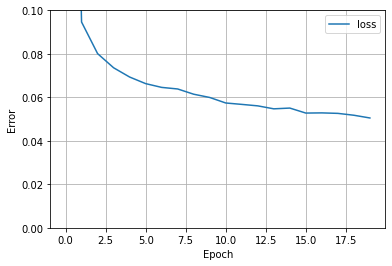

In [23]:

np.set_printoptions(precision=3, suppress=True)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plt.figure(1)


def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.ylim((0.0, 0.1))
    plt.legend()
    plt.grid(True)


plot_loss(history)

2021-12-05 14:39:28.282632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


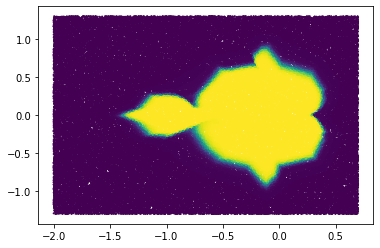

In [24]:

x = tf.random.uniform((100_000,), -2.0, 0.7, tf.float16)
y = tf.random.uniform((100_000,), -1.3, 1.3, tf.float16)
data = tf.stack([x, y], axis=1)
predictions = model.predict(data)

plt.figure(2)
plot = plt.scatter(x, y, s=1, c=predictions)
plt.show()
